In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [2]:
model_dir = '/aiffel/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [3]:
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7cb4cf8ac910>)

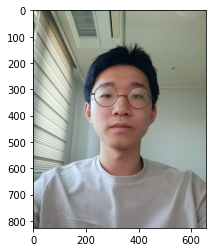

In [4]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/6.jpg'  
img_orig = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [7]:
# pascalvoc 데이터 라벨
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

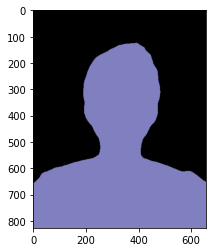

In [8]:
plt.imshow(output)
plt.show()

In [9]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [10]:
# segvalues의 class_ids에 존재하는 값을 LABEL_NAMES와 비교
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [11]:
# PixelLib에서 사용한 Colormap Code
# 각 위치의 색상정보를 가짐
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
# 15번(person) Colormap 정보
colormap[15] #RGB

array([192, 128, 128])

In [13]:
seg_color = (colormap[15][1], colormap[15][2], colormap[15][0])
print(seg_color)

(128, 128, 192)


(826, 656)
bool


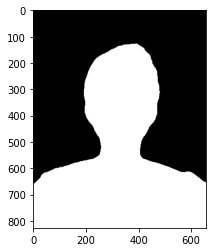

In [14]:
# seg_color에 해당하는 값을 찾음
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
print(seg_map.dtype)

plt.imshow(seg_map, cmap='gray')
plt.show()

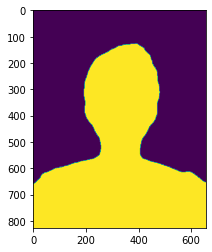

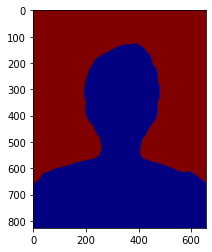

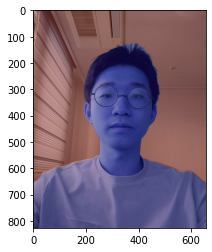

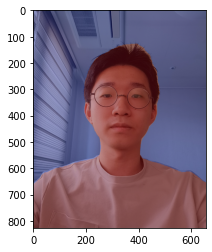

In [15]:
# origin img copy
img_show = img_orig.copy()

# seg_map.dtype == bool(true, false)
# seg_map의 type을 uint8로 변환과 동시에 True 지점을 255로 변환
img_mask = seg_map.astype(np.uint8) * 255

# img_mask를 COLORMAP_JET 스펙트럼에 대응
# img_show(origin img)에 0.6, color_mask에 0.4의 픽셀 가중합 계산
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# img_mask
plt.imshow(img_mask)
plt.show()
# color_mask
plt.imshow(color_mask)
plt.show()
# color_mask와 원본 사진의 픽셀 가중합 출력
plt.imshow(img_show)
plt.show()
# 위의 이미지에서 RGB로 변환
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

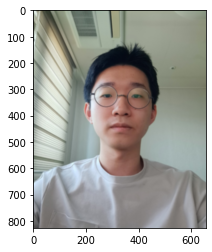

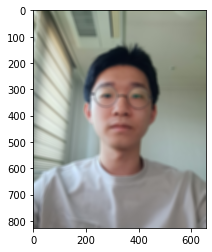

In [16]:
# blur 메소드를 통한 블러처리
# ksize=(13,13) : 평균 필터 크기, 홀수 지정
img_orig_blur = cv2.blur(img_orig, (5,5))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_orig_blur = cv2.blur(img_orig, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

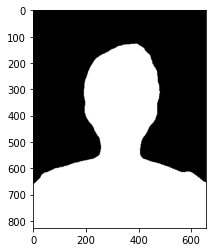

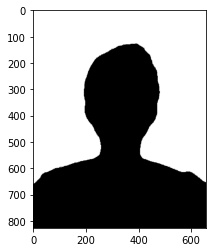

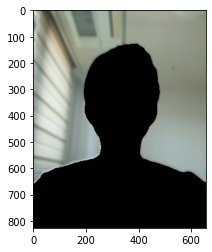

In [17]:
# img_mask_color : img_mask (Gray ->BGR)
# img_bg_mask : img_mask_color를 비트 반전
# img_bg_blur : 원본에 블러처리된 이미지와 img_bg_mask를 합침
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_mask_color, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_bg_mask, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

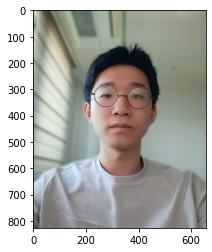

In [18]:
# img_mask_color의 색상이 255면 img_orig의 픽셀값을 출력, 아니면 blur의 픽셀값을 출력
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
cv2.imwrite('saved_image.jpg', img_concat)

True